In [28]:
import pandas as pd

# Max Intensity vs Manual Max Intensity

In [29]:
df1 = pd.read_csv('data/CLAW_Canola_OzON_Ratio_14Dec2023_6pm.csv')
df1
df2 = pd.read_csv('data/CLAW_Canola_OzON_Ratio_524.csv')
df2
#concatenate the two dataframes
df = pd.concat([df1, df2])
# df

In [30]:
#sort df by Purity and then Lipid
df.sort_values(by=['Purity', 'Lipid'], inplace=True)
#drop Ratio NaNs
df.dropna(subset=['Ratio'], inplace=True)
#drop duplicates
df = df.drop_duplicates(subset=['Purity', 'Lipid'], keep='last')
#reset index
df.reset_index(drop=True, inplace=True)
#Drop unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)


# df

In [31]:
df_crude = df[df['Purity'] == 'Crude']
df_degummed = df[df['Purity'] == 'Degummed']
df_RBD = df[df['Purity'] == 'RBD']
df_crude
df_degummed
df_RBD
df_combined = pd.DataFrame(columns=['Lipid', 'Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7'])
df_combined['Lipid'] = df_crude['Lipid']
df_combined['Crude n-9/n-7'] = df_crude['Ratio']
#add the ratio from degummed to the combined dataframe
df_combined['Degummed n-9/n-7'] = df_degummed['Ratio'].values
#add the ratio from RBD to the combined dataframe
df_combined['RBD n-9/n-7'] = df_RBD['Ratio'].values
df_combined['Retention_Time'] = df_crude['Retention_Time'].values
# df_combined.to_excel('CLAW_data/CLAW_Canola_OzON_Ratios.xlsx')
# df_combined.to_csv('CLAW_data/CLAW_Canola_OzON_Ratios.csv')
df_combined

,Lipid,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7,Retention_Time
0,[TG(52:2)]_FA18:1,4.23,4.31,4.70,18.05
1,[TG(52:3)]_FA18:1,3.16,2.50,3.07,16.09
2,[TG(52:4)]_FA18:1,3.05,2.96,2.68,14.30
3,[TG(54:2)]_FA18:1,4.31,3.84,4.48,20.00
4,[TG(54:3)]_FA18:1,5.81,5.75,5.41,17.98
5,[TG(54:4)]_FA18:1,4.91,4.07,4.97,16.07
6,[TG(54:5)]_FA18:1,4.09,3.83,3.83,14.31


In [32]:
df_MaxI = df_combined.copy()
df_MaxI.to_excel('CLAW_data/MaxIntensity_data/MaxI_CLAW_Ratios.xlsx')
df_MaxI

,Lipid,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7,Retention_Time
0,[TG(52:2)]_FA18:1,4.23,4.31,4.70,18.05
1,[TG(52:3)]_FA18:1,3.16,2.50,3.07,16.09
2,[TG(52:4)]_FA18:1,3.05,2.96,2.68,14.30
3,[TG(54:2)]_FA18:1,4.31,3.84,4.48,20.00
4,[TG(54:3)]_FA18:1,5.81,5.75,5.41,17.98
5,[TG(54:4)]_FA18:1,4.91,4.07,4.97,16.07
6,[TG(54:5)]_FA18:1,4.09,3.83,3.83,14.31


In [33]:
df_MaxI_manual = df_MaxI.copy()

df_MaxI_manual

,Lipid,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7,Retention_Time
0,[TG(52:2)]_FA18:1,4.23,4.31,4.70,18.05
1,[TG(52:3)]_FA18:1,3.16,2.50,3.07,16.09
2,[TG(52:4)]_FA18:1,3.05,2.96,2.68,14.30
3,[TG(54:2)]_FA18:1,4.31,3.84,4.48,20.00
4,[TG(54:3)]_FA18:1,5.81,5.75,5.41,17.98
5,[TG(54:4)]_FA18:1,4.91,4.07,4.97,16.07
6,[TG(54:5)]_FA18:1,4.09,3.83,3.83,14.31


# Area

In [34]:
# area_df = pd.read_csv('CLAW_data/Area_data/CLAW_Canola_AreaPlots_05Jan24.csv')
area_df = pd.read_csv('CLAW_data/Area_data/CLAW_CanolaOil_Results_05Jan2024_25.csv')
area_df

area_manual_df = pd.read_csv('CLAW_data/Area_data/canola_area_manual.csv')
area_manual_df

,Lipid,RT (min),Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7
0,[TG(52:2)]_FA18:1,18.05,3.92,3.76,4.13
1,[TG(52:3)]_FA18:1,16.30,2.20,3.25,2.34
2,[TG(52:4)]_FA18:1,14.31,2.31,2.25,2.18
3,[TG(54:2)]_FA18:1,20.00,4.27,3.03,4.36
4,[TG(54:3)]_FA18:1,18.00,4.88,4.94,4.57
5,[TG(54:4)]_FA18:1,16.00,3.78,4.06,4.04
6,[TG(54:5)]_FA18:1,14.00,5.58,5.65,4.45


In [35]:
area_df_2 = area_df[['Lipid', 'Retention_Time', 'Purity', 'Area_DDT', 'Area_DDT_Ratio']]
#round ratios to 2 decimal places
area_df_2['Area_DDT_Ratio'] = area_df_2['Area_DDT_Ratio'].round(2)
area_df_2

/tmp/ipykernel_43427/3969430332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_df_2['Area_DDT_Ratio'] = area_df_2['Area_DDT_Ratio'].round(2)


,Lipid,Retention_Time,Purity,Area_DDT,Area_DDT_Ratio
0,[TG(52:2)]_FA18:1,18.05,Crude,593.0,3.52
1,[TG(52:2)]_FA18:1,18.05,Crude,2090.0,3.52
2,[TG(52:3)]_FA18:1,16.04,Crude,215.0,2.23
3,[TG(52:3)]_FA18:1,16.09,Crude,479.0,2.23
4,[TG(52:4)]_FA18:1,14.31,Crude,107.0,2.63
5,[TG(52:4)]_FA18:1,14.30,Crude,281.0,2.63
6,[TG(54:2)]_FA18:1,19.98,Crude,429.0,4.01
7,[TG(54:2)]_FA18:1,20.00,Crude,1722.0,4.01
8,[TG(54:3)]_FA18:1,17.98,Crude,2409.0,4.90
9,[TG(54:3)]_FA18:1,17.98,Crude,11802.0,4.90


# Area vs Area Manual

In [36]:
# import os

# def create_combined_scatter_plot(df1, df2, x_column_df1, y_column_df1, x_column_df2, y_column_df2, title, save_dir, file_name):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df1[x_column_df1], df1[y_column_df1], label='MANUAL Data', marker='s')
#     plt.scatter(df2[x_column_df2], df2[y_column_df2], label='CLAW Data')
#     plt.xlabel('Lipid')
#     plt.ylabel('Ratio')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
    
#     # # Save the plot as PNG and PDF
#     # plt.savefig(os.path.join(save_dir, f'{file_name}.png'), bbox_inches='tight')
#     # plt.savefig(os.path.join(save_dir, f'{file_name}.pdf'), bbox_inches='tight')
#     plt.show()
#     plt.close()

# # Ensure save directory exists
# save_dir = 'Projects/canola/plots/CLAW/Ratios/'
# os.makedirs(save_dir, exist_ok=True)

# # Filter area_df DataFrame for each category
# df_crude_d9 = area_df[area_df['Purity'] == 'Crude']
# df_degummed_d9 = area_df[area_df['Purity'] == 'Degummed']
# df_rbd_d9 = area_df[area_df['Purity'] == 'RBD']

# # Area ratio column to plot
# area_ratio_columns = ['Area_DDT_Ratio']

# # Plotting combined scatter plots for each area ratio column and for each purity category
# for area_ratio_column in area_ratio_columns:
#     create_combined_scatter_plot(area_manual_df, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Lipid', area_ratio_column, f'Crude: Lipid vs {area_ratio_column}', save_dir, f'Crude_{area_ratio_column}')
#     create_combined_scatter_plot(area_manual_df, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Lipid', area_ratio_column, f'Degummed: Lipid vs {area_ratio_column}', save_dir, f'Degummed_{area_ratio_column}')
#     create_combined_scatter_plot(area_manual_df, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'Lipid', area_ratio_column, f'RBD: Lipid vs {area_ratio_column}', save_dir, f'RBD_{area_ratio_column}')


# MaxI vs MaxI manual

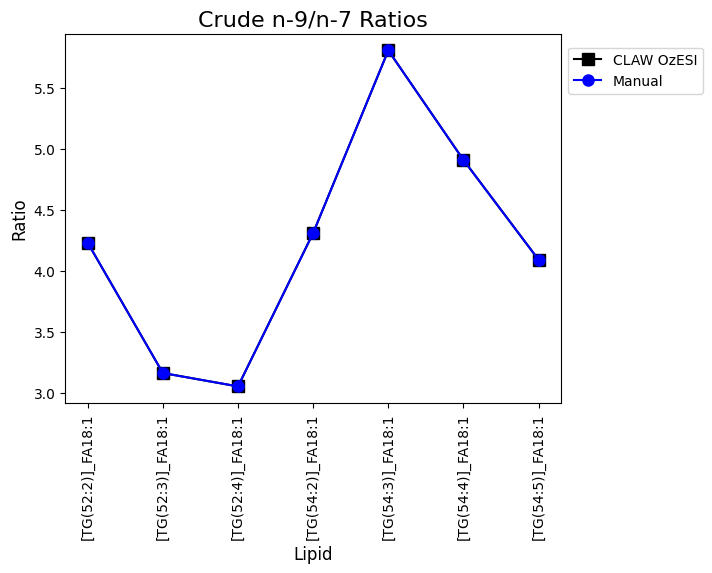

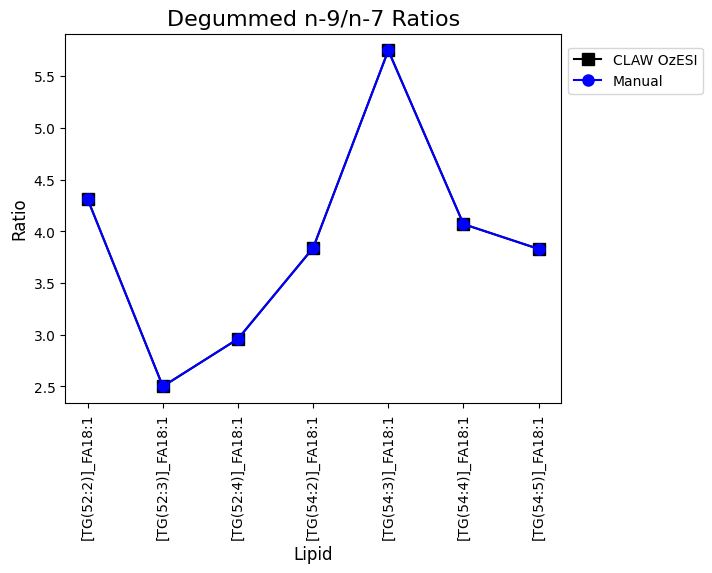

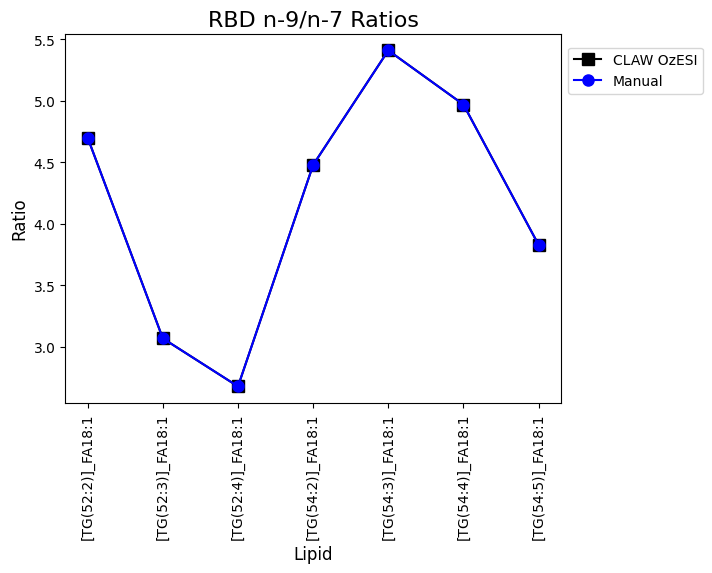

<Figure size 640x480 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

# Define the purity types and corresponding ratio columns
purity_types = [
    {"type": "Crude", "ratio_col": 'Crude n-9/n-7', "title": 'Crude n-9/n-7 Ratios'},
    {"type": "Degummed", "ratio_col": 'Degummed n-9/n-7', "title": 'Degummed n-9/n-7 Ratios'},
    {"type": "RBD", "ratio_col": 'RBD n-9/n-7', "title": 'RBD n-9/n-7 Ratios'},


]

for purity in purity_types:
    # Plot OzESI data
    plt.plot(df_MaxI['Lipid'], df_MaxI[purity["ratio_col"]], 's-', color='black', label='CLAW OzESI', markersize=8)
    
    # Plot Caitlin data
    plt.plot(df_MaxI_manual['Lipid'], df_MaxI_manual[purity["ratio_col"]], 'o-', color='blue', label='Manual', markersize=8)
    
    # Labeling and styling
    plt.xlabel('Lipid', fontsize=12)
    plt.ylabel('Ratio', fontsize=12)
    plt.title(purity["title"], size=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    plt.xticks(rotation=90)

    #print to pdf
    plt.savefig(f'CLAW_data/MaxIntensity_data/plots/{purity["type"]}_MaxI_Ratios.pdf', bbox_inches='tight')
    plt.savefig(f'CLAW_data/MaxIntensity_data/plots/{purity["type"]}_MaxI_Ratios.png', bbox_inches='tight')

    # Show and clear the plot for the next iteration
    plt.show()
    plt.clf()


# MaxI, MaxI_Manual, Area, AreaManual

In [38]:
# import matplotlib.pyplot as plt
# import os

# # Define the purity types and corresponding ratio columns
# purity_types = [
#         {"type": "Crude", "ratio_col": 'Crude n-9/n-7', "title": 'Crude n-9/n-7 Ratios', "area_df_col": 'Area_Crude_Ratio'},
#      {"type": "Degummed", "ratio_col": 'Degummed n-9/n-7', "title": 'Degummed n-9/n-7 Ratios', "area_df_col": 'Area_Degummed_Ratio'},
#     {"type": "RBD", "ratio_col": 'RBD n-9/n-7', "title": 'RBD n-9/n-7 Ratios', "area_df_col": 'Area_RBD_Ratio'}
   

# ]

# # Loop through each purity type
# for purity in purity_types:
#     plt.figure(figsize=(10, 6))

#     # Plot each dataset
#     plt.plot(df_MaxI['Lipid'], df_MaxI[purity["ratio_col"]], 'o-', color='black', label='CLAW Max Intensity', markersize=10)
#     # plt.plot(df_MaxI_manual['Lipid'], df_MaxI_manual[purity["ratio_col"]], 'o-', color='blue', label='Manual Max Intensity ', markersize=8)
#     plt.plot(area_manual_df['Lipid'], area_manual_df[purity["ratio_col"]], 'o-', color='blue', label='Manual Area ', markersize=10)

#     # Filter area_df_2 for the current purity and plot
#     df_filtered = area_df_2[area_df_2['Purity'] == purity["type"]]
#     # plt.plot(df_filtered['Lipid'], df_filtered['Area_DDT_Ratio'], color='green', label='CLAW Area', marker='s', markersize=8)

#     # Labeling and styling
#     plt.xlabel('Lipid', fontsize=14)
#     plt.ylabel('Ratio', fontsize=14)
#     plt.title(purity["title"], size=16)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
#     plt.xticks(rotation=90)

#         # Add grid lines to the plot
#     plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

#     plt.show()
#     plt.clf()

# # area_df_2


# Fix area df to be more like a pivot table

In [39]:
# Concise version of the code for filtering and transforming area_df_2 for Crude, Degummed, and RBD purities

def filter_and_transform(df, purity, ratio_col_name):
    filtered_df = df[df['Purity'] == purity].copy()
    filtered_df[ratio_col_name] = filtered_df['Area_DDT_Ratio']
    return filtered_df[['Lipid', 'Retention_Time', ratio_col_name]]

# Applying the function for each purity
crude_df = filter_and_transform(area_df_2, 'Crude', 'Crude n-9/n-7')
degummed_df = filter_and_transform(area_df_2, 'Degummed', 'Degummed n-9/n-7')
rbd_df = filter_and_transform(area_df_2, 'RBD', 'RBD n-9/n-7')

# Display the first few rows to verify the transformations
crude_df.head(), degummed_df.head(), rbd_df.head()




# First, let's fill NaN values with 0 for each of the three dataframes
crude_df_filled = crude_df.fillna(0)
degummed_df_filled = degummed_df.fillna(0)
rbd_df_filled = rbd_df.fillna(0)

# Merge the dataframes on 'Lipid' and 'Retention_Time'
merged_crude_degummed = pd.merge(crude_df_filled, degummed_df_filled, on=['Lipid', 'Retention_Time'], how='outer')
merged_all = pd.merge(merged_crude_degummed, rbd_df_filled, on=['Lipid', 'Retention_Time'], how='outer')

# Fill NaN values with 0 in the merged dataframe
merged_all.fillna(0, inplace=True)

# Group by 'Lipid' and take the maximum value for each column to ensure only one row per Lipid with no NaNs
area_df_3 = merged_all.groupby('Lipid').max().reset_index()

area_df_3.to_excel('CLAW_data/Area_data/CLAW_Canola_AreaPivotTable_05Jan24.xlsx')

area_df_3  # Display the first few rows to verify the transformation



,Lipid,Retention_Time,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7
0,[TG(52:2)]_FA18:1,18.07,3.52,3.51,4.14
1,[TG(52:3)]_FA18:1,16.16,2.23,3.13,2.52
2,[TG(52:4)]_FA18:1,14.35,2.63,1.81,2.36
3,[TG(54:2)]_FA18:1,20.04,4.01,3.27,4.16
4,[TG(54:3)]_FA18:1,18.01,4.90,4.50,4.44
5,[TG(54:4)]_FA18:1,16.12,3.58,3.71,3.97
6,[TG(54:5)]_FA18:1,14.33,6.08,5.40,4.61


In [40]:
df_MaxI
area_manual_df

,Lipid,RT (min),Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7
0,[TG(52:2)]_FA18:1,18.05,3.92,3.76,4.13
1,[TG(52:3)]_FA18:1,16.30,2.20,3.25,2.34
2,[TG(52:4)]_FA18:1,14.31,2.31,2.25,2.18
3,[TG(54:2)]_FA18:1,20.00,4.27,3.03,4.36
4,[TG(54:3)]_FA18:1,18.00,4.88,4.94,4.57
5,[TG(54:4)]_FA18:1,16.00,3.78,4.06,4.04
6,[TG(54:5)]_FA18:1,14.00,5.58,5.65,4.45


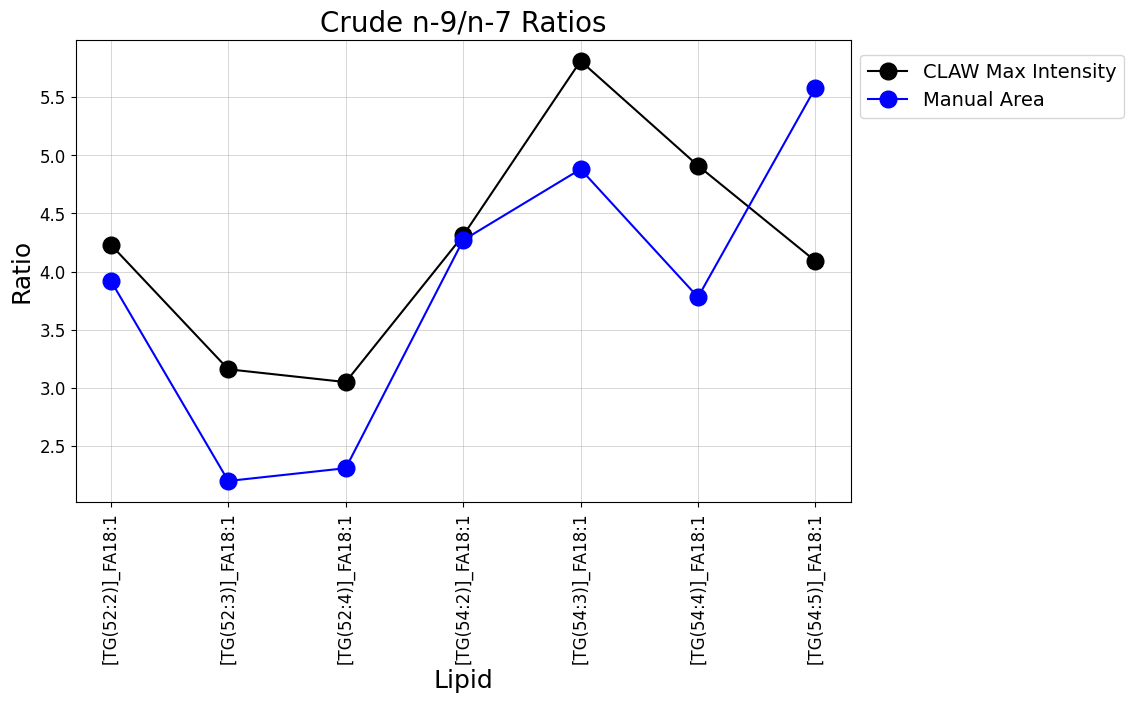

<Figure size 640x480 with 0 Axes>

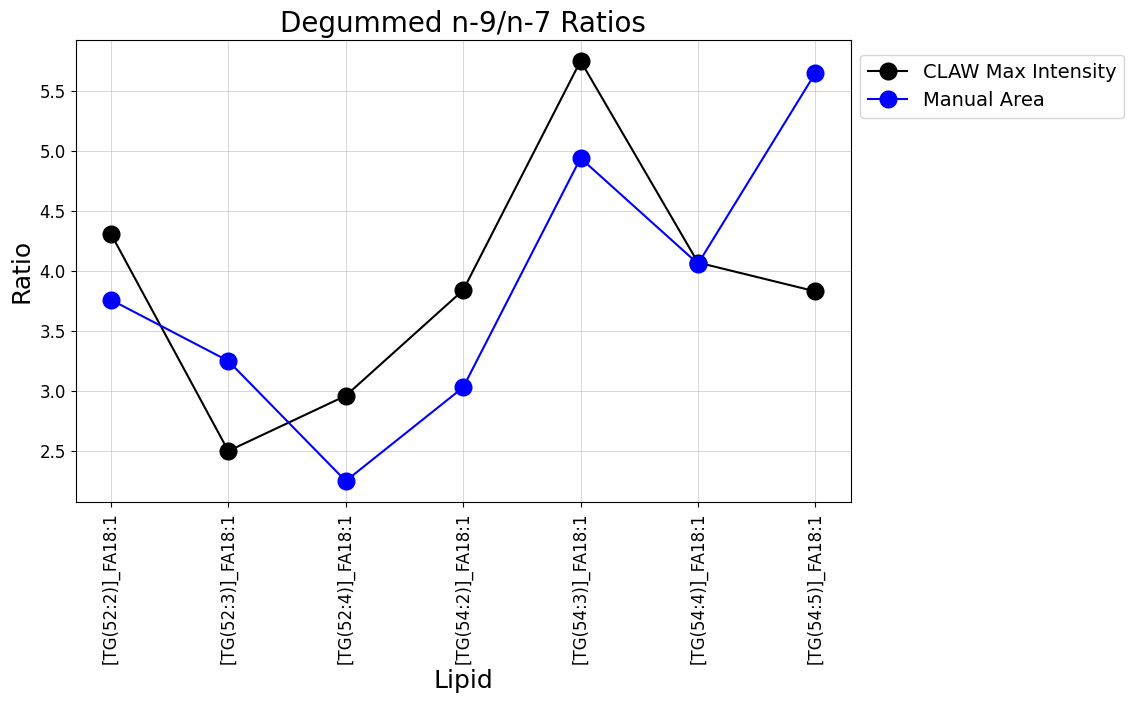

<Figure size 640x480 with 0 Axes>

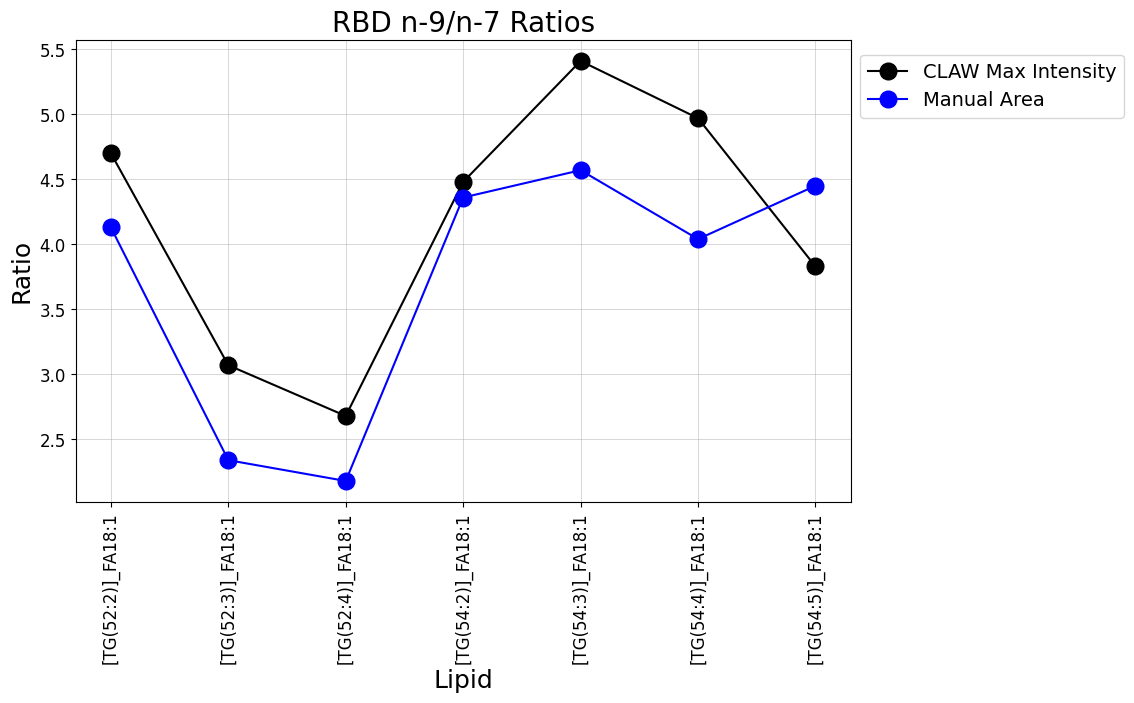

<Figure size 640x480 with 0 Axes>

In [41]:
# Updated plotting code to use area_df_3
savedir = 'plots/CLAW/Ratios/AreaVMaxI'
import matplotlib.pyplot as plt

# Define the purity types and corresponding ratio columns
purity_types = [
    {"type": "Crude", "ratio_col": 'Crude n-9/n-7', "title": 'Crude n-9/n-7 Ratios'},
    {"type": "Degummed", "ratio_col": 'Degummed n-9/n-7', "title": 'Degummed n-9/n-7 Ratios'},
    {"type": "RBD", "ratio_col": 'RBD n-9/n-7', "title": 'RBD n-9/n-7 Ratios'},
]

# Loop through each purity type
for purity in purity_types:
    plt.figure(figsize=(10, 6))

    # Plot each dataset
    plt.plot(df_MaxI['Lipid'], df_MaxI[purity["ratio_col"]], 'o-', color='black', label='CLAW Max Intensity', markersize=12)
    # plt.plot(df_MaxI_manual['Lipid'], df_MaxI_manual[purity["ratio_col"]], 'o-', color='grey', label='Max Intensity Manual', markersize=8)
    # Plot data from area_df_3 for the current purity
    # plt.plot(area_df_3['Lipid'], area_df_3[purity["ratio_col"]], 's-', color='green', label='Area CLAW', markersize=8)
    plt.plot(area_manual_df['Lipid'], area_manual_df[purity["ratio_col"]], 'o-', color='blue', label='Manual Area', markersize=12)
    


    # Labeling and styling
    plt.xlabel('Lipid', fontsize=18)
    plt.ylabel('Ratio', fontsize=18)
    plt.title(purity["title"], size=20)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=90, fontsize=12)
        # Add grid lines to the plot
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    # Save the plot
    filename = f"{savedir}/AreaVsMaxI_{purity['type']}.png"
    plt.savefig(filename, bbox_inches='tight')
    filename = f"{savedir}/AreaVsMaxI_{purity['type']}.pdf"
    plt.savefig(filename, bbox_inches='tight')

    plt.show()
    plt.clf()



# STd Dev

In [42]:

# area_df_3
area_manual_df
df_MaxI
# df_MaxI_manual
# #write these dataframes to csv
# area_df_2.to_csv('CLAW_data/Area_data/area_df_2_ratios.csv')
# area_manual_df.to_csv('CLAW_data/Area_data/area_manual_df_ratios.csv')
# df_MaxI.to_csv('CLAW_data/MaxIntensity_data/df_MaxI_ratios.csv')
# df_MaxI_manual.to_csv('CLAW_data/MaxIntensity_data/df_MaxI_manual_ratios.csv')


,Lipid,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7,Retention_Time
0,[TG(52:2)]_FA18:1,4.23,4.31,4.70,18.05
1,[TG(52:3)]_FA18:1,3.16,2.50,3.07,16.09
2,[TG(52:4)]_FA18:1,3.05,2.96,2.68,14.30
3,[TG(54:2)]_FA18:1,4.31,3.84,4.48,20.00
4,[TG(54:3)]_FA18:1,5.81,5.75,5.41,17.98
5,[TG(54:4)]_FA18:1,4.91,4.07,4.97,16.07
6,[TG(54:5)]_FA18:1,4.09,3.83,3.83,14.31


# std dev rows using pandas function

# CLAW MaxI StdDev

In [70]:
df_MaxI_StdDev = df_MaxI[['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']].std(axis=1).round(2)
df_MaxI_StdDev
#mean of the standard deviations
# df_MaxI_StdDev.mean()


0    0.25
1    0.36
2    0.19
3    0.33
4    0.22
5    0.50
6    0.15
dtype: float64

# Manual Area std dev

In [71]:
area_manual_df_StdDev = area_manual_df[['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']].std(axis=1).round(2)
area_manual_df_StdDev
#mean of the standard deviations
# area_manual_df_StdDev.mean()

0    0.19
1    0.57
2    0.07
3    0.74
4    0.20
5    0.16
6    0.67
dtype: float64

# MaxI vs Area DIFFERENCES Std Dev 

In [63]:
import pandas as pd
import numpy as np

def calculate_std_dev_of_differences(df1, df2, column_name):
    """
    Calculate the standard deviation of the differences between corresponding values 
    in two dataframes for a specific column.

    :param df1: First pandas DataFrame.
    :param df2: Second pandas DataFrame.
    :param column_name: The column for which to calculate the standard deviation of differences.
    :return: Standard deviation of the differences.
    """
    # Check if the column exists in both dataframes
    if column_name not in df1.columns or column_name not in df2.columns:
        raise ValueError(f"Column {column_name} not found in one of the dataframes.")

    # Calculate differences between corresponding values
    differences = df1[column_name] - df2[column_name]
    # Calculate standard deviation of these differences
    std_dev = np.std(differences).round(2)

    return std_dev

# Example usage
std_dev_diff_crude = calculate_std_dev_of_differences(df_MaxI, area_manual_df, 'Crude n-9/n-7')
std_dev_diff_degummed = calculate_std_dev_of_differences(df_MaxI, area_manual_df, 'Degummed n-9/n-7')
std_dev_diff_rbd = calculate_std_dev_of_differences(df_MaxI, area_manual_df, 'RBD n-9/n-7')
print(f"Standard deviation of differences for Crude: {std_dev_diff_crude}")
print(f"Standard deviation of differences for Degummed: {std_dev_diff_degummed}")
print(f"Standard deviation of differences for RBD: {std_dev_diff_rbd}")

#calculate the mean of all three
std_dev_diff_mean = (std_dev_diff_crude + std_dev_diff_degummed + std_dev_diff_rbd)/3
print(f"Mean of standard deviation of differences for all three: {std_dev_diff_mean}")


Standard deviation of differences for Crude: 0.84
Standard deviation of differences for Degummed: 0.92
Standard deviation of differences for RBD: 0.5
Mean of standard deviation of differences for all three: 0.7533333333333333


# Std dev across purities for MaxI

In [44]:
# Creating a new DataFrame to store standard deviation data

# Initialize an empty DataFrame with 'Lipid' column from df_MaxI
df_sd = pd.DataFrame()
df_sd['Lipid'] = df_MaxI['Lipid'].unique()

# Define a function to calculate the standard deviation across Crude, Degummed, and RBD for each lipid
def calculate_std_for_lipid(lipid):
    lipid_data = df_MaxI[df_MaxI['Lipid'] == lipid][['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']]
    return lipid_data.std(axis=1).mean().round(2)

# Calculate the standard deviation for each lipid and store it in 'Area_SD' column
df_sd['Area_SD'] = df_sd['Lipid'].apply(calculate_std_for_lipid)

df_sd  # Display the first few rows to verify the output

# df_sd.mean().round(2)

df_sd.to_excel('CLAW_data/MaxIntensity_data/CLAW_MaxIntensity_StdDev.xlsx')

df_sd
df_sd.mean().round(2)




Area_SD    0.29
dtype: float64

# Std Dev across purities for Manual Area

In [45]:
# Creating a new DataFrame to store standard deviation data

# Initialize an empty DataFrame with 'Lipid' column from area_manual_df
df_area_manual_sd = pd.DataFrame()
df_area_manual_sd['Lipid'] = area_manual_df['Lipid'].unique()

# Define a function to calculate the standard deviation across Crude, Degummed, and RBD for each lipid
def calculate_std_for_lipid(lipid):
    lipid_data = area_manual_df[area_manual_df['Lipid'] == lipid][['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']]
    return lipid_data.std(axis=1).mean().round(2)

# Calculate the standard deviation for each lipid and store it in 'Area_SD' column
df_area_manual_sd['Area_SD'] = df_area_manual_sd['Lipid'].apply(calculate_std_for_lipid)

df_area_manual_sd.to_excel('CLAW_data/Area_data/CLAW_ManualArea_StdDev.xlsx')

df_area_manual_sd  # Display the first few rows to verify the output



,Lipid,Area_SD
0,[TG(52:2)]_FA18:1,0.19
1,[TG(52:3)]_FA18:1,0.57
2,[TG(52:4)]_FA18:1,0.07
3,[TG(54:2)]_FA18:1,0.74
4,[TG(54:3)]_FA18:1,0.20
5,[TG(54:4)]_FA18:1,0.16
6,[TG(54:5)]_FA18:1,0.67


# Calculate std deviation

In [46]:

# area_df_3
# area_manual_df
# df_MaxI
# df_MaxI_manual
def calculate_and_append_std(df, result_df, lipid_column, columns_list, column_name='Std_Dev'):
    # Function to calculate std deviation for a single lipid
    def std_for_lipid(lipid):
        lipid_data = df[df[lipid_column] == lipid][columns_list]
        return lipid_data.std(axis=1).mean().round(2)

    # Calculate standard deviation for each lipid in df and create a new DataFrame
    new_results = pd.DataFrame(df[lipid_column].unique(), columns=[lipid_column])
    new_results[column_name] = new_results[lipid_column].apply(std_for_lipid)

    # Append new_results to result_df or create it if not exists
    if result_df is not None:
        combined = pd.merge(result_df, new_results, on=lipid_column, how='outer')
    else:
        combined = new_results

    return combined

# Initialize an empty DataFrame to store results
df_sd_generalized = None

# Calculate and append standard deviation for each dataframe
columns_to_calculate_std = ['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']
df_sd_generalized = calculate_and_append_std(area_df_3, df_sd_generalized, 'Lipid', columns_to_calculate_std, column_name='Area_SD_Across_Purities')
df_sd_generalized = calculate_and_append_std(area_manual_df, df_sd_generalized, 'Lipid', columns_to_calculate_std, column_name='Area_Manual_SD_Across_Purities')
df_sd_generalized = calculate_and_append_std(df_MaxI, df_sd_generalized, 'Lipid', columns_to_calculate_std, column_name='Max_Intensity_SD_Across_Purities')
df_sd_generalized = calculate_and_append_std(df_MaxI_manual, df_sd_generalized, 'Lipid', columns_to_calculate_std, column_name='Max_Intensity_Manual_SD_Across_Purities')

# Display the first few rows
df_sd_generalized.head()


,Lipid,Area_SD_Across_Purities,Area_Manual_SD_Across_Purities,Max_Intensity_SD_Across_Purities,Max_Intensity_Manual_SD_Across_Purities
0,[TG(52:2)]_FA18:1,0.36,0.19,0.25,0.25
1,[TG(52:3)]_FA18:1,0.46,0.57,0.36,0.36
2,[TG(52:4)]_FA18:1,0.42,0.07,0.19,0.19
3,[TG(54:2)]_FA18:1,0.48,0.74,0.33,0.33
4,[TG(54:3)]_FA18:1,0.25,0.20,0.22,0.22


In [47]:
def std_dev_avg(df, columns_list):
    # Initialize an empty DataFrame to store the results
    df_std_dev_avg = pd.DataFrame(columns=['Data', 'Std_Dev_Average'])

    # Iterate over the list of columns to calculate the average
    for column in columns_list:
        if column in df.columns:
            avg = df[column].mean().round(2)
            df_std_dev_avg = df_std_dev_avg.append({'Data': column, 'Std_Dev_Average': avg}, ignore_index=True)
        else:
            df_std_dev_avg = df_std_dev_avg.append({'Data': column, 'Std_Dev_Average': 'Column not found'}, ignore_index=True)

    return df_std_dev_avg

# Example usage of the function
columns_to_average = ['Area_SD_Across_Purities', 'Area_Manual_SD_Across_Purities', 'Max_Intensity_SD_Across_Purities', 'Max_Intensity_Manual_SD_Across_Purities']
df_std_dev_avg_example = std_dev_avg(df_sd_generalized, columns_to_average)

df_std_dev_avg_example


,Data,Std_Dev_Average
0,Area_SD_Across_Purities,0.42
1,Area_Manual_SD_Across_Purities,0.37
2,Max_Intensity_SD_Across_Purities,0.29
3,Max_Intensity_Manual_SD_Across_Purities,0.29


In [48]:
import numpy as np

def compare_lipid_ratios_with_std(df1, df2, lipid_column, columns_list):
    # Initialize a new DataFrame to store comparison results
    comparison_df = pd.DataFrame(columns=[lipid_column] + [f'{col}_StdDev' for col in columns_list])

    # Function to calculate the standard deviation of differences for a single lipid
    def std_dev_difference(lipid):
        if lipid in df1[lipid_column].values and lipid in df2[lipid_column].values:
            df1_values = df1[df1[lipid_column] == lipid][columns_list].iloc[0]
            df2_values = df2[df2[lipid_column] == lipid][columns_list].iloc[0]
            std_devs = {f'{col}_StdDev': np.std([df1_values[col], df2_values[col]]) for col in columns_list}
        else:
            std_devs = {f'{col}_StdDev': 'N/A' for col in columns_list}
        return std_devs

    # Apply the function to each lipid
    for lipid in set(df1[lipid_column]).union(set(df2[lipid_column])):
        std_dev_results = std_dev_difference(lipid)
        comparison_df = comparison_df.append({lipid_column: lipid, **std_dev_results}, ignore_index=True)

    return comparison_df

# Example usage of the function
columns_to_compare = ['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7']
Area_dif = compare_lipid_ratios_with_std(area_df_3, area_manual_df, 'Lipid', columns_to_compare)

Area_dif # Display the first few rows

# MaxI_dif = compare_lipid_ratios_with_std(df_MaxI, df_MaxI_manual, 'Lipid', columns_to_compare)

# #Check mean
# print(MaxI_dif['RBD n-9/n-7_StdDev'].mean().round(2))
# MaxI_dif # Display the first few rows



# Example usage of the function
columns_to_average = ['Crude n-9/n-7_StdDev', 'Degummed n-9/n-7_StdDev', 'RBD n-9/n-7_StdDev']
df_std_dev_avg_example = std_dev_avg(Area_dif, columns_to_average)

df_std_dev_avg_example


,Data,Std_Dev_Average
0,Crude n-9/n-7_StdDev,0.12
1,Degummed n-9/n-7_StdDev,0.15
2,RBD n-9/n-7_StdDev,0.07


In [49]:
#mean of std_dev_average
df_std_dev_avg_example['Std_Dev_Average'].mean().round(2)

0.11

In [50]:
area_df_3

,Lipid,Retention_Time,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7
0,[TG(52:2)]_FA18:1,18.07,3.52,3.51,4.14
1,[TG(52:3)]_FA18:1,16.16,2.23,3.13,2.52
2,[TG(52:4)]_FA18:1,14.35,2.63,1.81,2.36
3,[TG(54:2)]_FA18:1,20.04,4.01,3.27,4.16
4,[TG(54:3)]_FA18:1,18.01,4.90,4.50,4.44
5,[TG(54:4)]_FA18:1,16.12,3.58,3.71,3.97
6,[TG(54:5)]_FA18:1,14.33,6.08,5.40,4.61


# MaxInt barplot

In [51]:

df_MaxI


,Lipid,Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7,Retention_Time
0,[TG(52:2)]_FA18:1,4.23,4.31,4.70,18.05
1,[TG(52:3)]_FA18:1,3.16,2.50,3.07,16.09
2,[TG(52:4)]_FA18:1,3.05,2.96,2.68,14.30
3,[TG(54:2)]_FA18:1,4.31,3.84,4.48,20.00
4,[TG(54:3)]_FA18:1,5.81,5.75,5.41,17.98
5,[TG(54:4)]_FA18:1,4.91,4.07,4.97,16.07
6,[TG(54:5)]_FA18:1,4.09,3.83,3.83,14.31


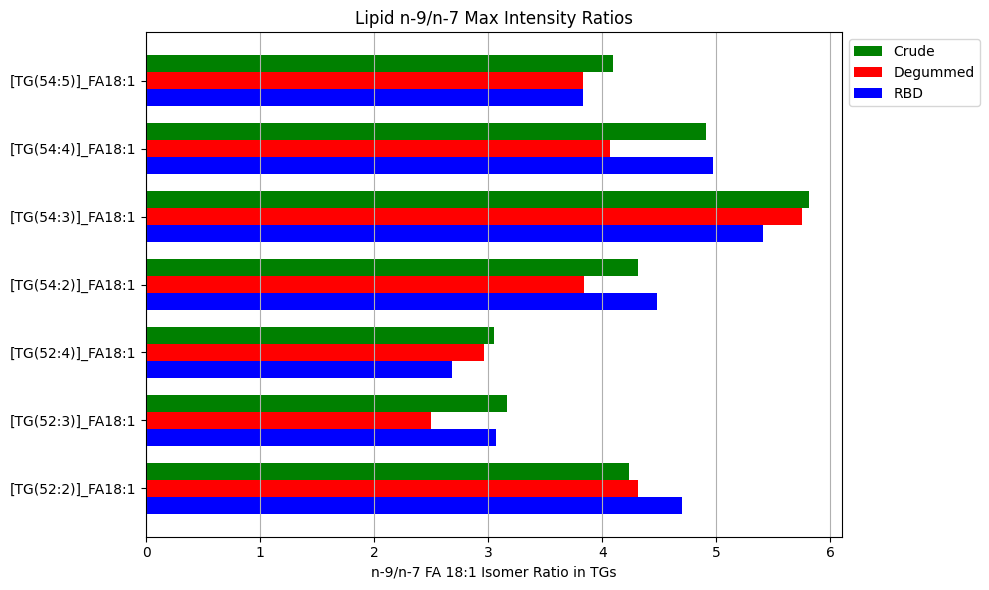

In [52]:
# Setting the positions and width for the bars
pos = list(range(len(df_MaxI['Crude n-9/n-7'])))
width = 0.25


fig, ax = plt.subplots(figsize=(10, 6))

# Creating horizontal bars
plt.barh([p + width for p in pos], df_MaxI['Crude n-9/n-7'], width, label='Crude n-9/n-7', color='green')
plt.barh([p for p in pos], df_MaxI['Degummed n-9/n-7'], width, label='Degummed n-9/n-7', color='red')
plt.barh([p - width for p in pos], df_MaxI['RBD n-9/n-7'], width, label='RBD n-9/n-7', color='blue')

# Set the x axis label
ax.set_xlabel('n-9/n-7 FA 18:1 Isomer Ratio in TGs')

# Set the chart's title
ax.set_title('Lipid n-9/n-7 Max Intensity Ratios')

# Set the position of the y ticks
ax.set_yticks([p for p in pos])

# Set the labels for the y ticks
ax.set_yticklabels(df_MaxI['Lipid'])

# Adding the legend outside of the plot
plt.legend(['Crude', 'Degummed', 'RBD'], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('CLAW_data/MaxIntensity_data/plots/MaxI_Ratios_Barplot.pdf')
plt.savefig('CLAW_data/MaxIntensity_data/plots/MaxI_Ratios_Barplot.png')

plt.show()


# caitlin way

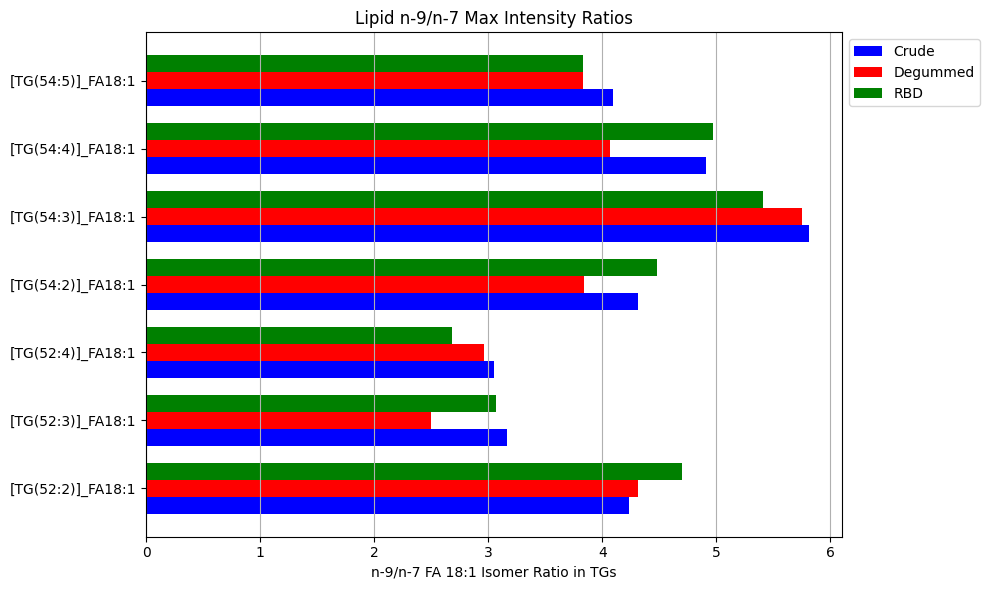

In [53]:
# Setting the positions and width for the bars
pos = list(range(len(df_MaxI['Crude n-9/n-7'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Creating horizontal bars
# Order: Crude (blue), Degummed (red), RBD (green)
plt.barh([p - width for p in pos], df_MaxI['Crude n-9/n-7'], width, label='Crude n-9/n-7', color='blue')
plt.barh([p for p in pos], df_MaxI['Degummed n-9/n-7'], width, label='Degummed n-9/n-7', color='red')
plt.barh([p + width for p in pos], df_MaxI['RBD n-9/n-7'], width, label='RBD n-9/n-7', color='green')

# Set the x-axis label
ax.set_xlabel('n-9/n-7 FA 18:1 Isomer Ratio in TGs')

# Set the chart's title
ax.set_title('Lipid n-9/n-7 Max Intensity Ratios')

# Set the position of the y-ticks
ax.set_yticks([p for p in pos])

# Set the labels for the y-ticks
ax.set_yticklabels(df_MaxI['Lipid'])

# Adding the legend and matching the order to the bar plot
plt.legend(['Crude', 'Degummed', 'RBD'], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.tight_layout()

# Saving the plots
plt.savefig('CLAW_data/MaxIntensity_data/plots/MaxI_Ratios_Barplot_c.pdf')
plt.savefig('CLAW_data/MaxIntensity_data/plots/MaxI_Ratios_Barplot_c.png')

plt.show()


# Stacked sideways barplot

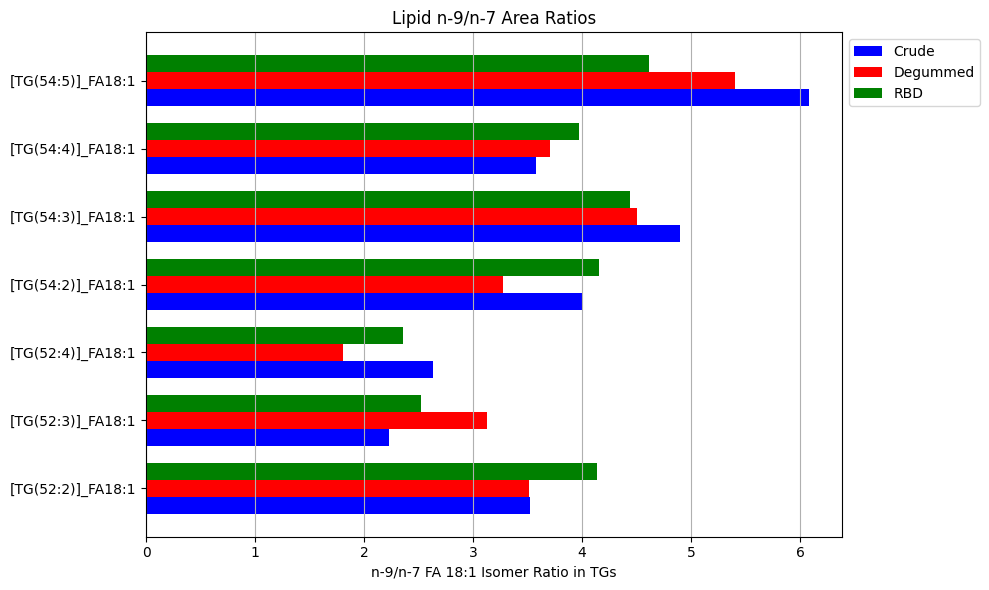

In [54]:
# Setting the positions and width for the bars
pos = list(range(len(area_df_3['Crude n-9/n-7'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Creating horizontal bars
# Order: Crude (blue), Degummed (red), RBD (green)
plt.barh([p - width for p in pos], area_df_3['Crude n-9/n-7'], width, label='Crude n-9/n-7', color='blue')
plt.barh([p for p in pos], area_df_3['Degummed n-9/n-7'], width, label='Degummed n-9/n-7', color='red')
plt.barh([p + width for p in pos], area_df_3['RBD n-9/n-7'], width, label='RBD n-9/n-7', color='green')

# Set the x-axis label
ax.set_xlabel('n-9/n-7 FA 18:1 Isomer Ratio in TGs')

# Set the chart's title
ax.set_title('Lipid n-9/n-7 Area Ratios')

# Set the position of the y-ticks
ax.set_yticks([p for p in pos])

# Set the labels for the y-ticks
ax.set_yticklabels(area_df_3['Lipid'])

# Adding the legend outside of the plot and ensuring the correct order
plt.legend(['Crude', 'Degummed', 'RBD'], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.tight_layout()
plt.show()
